# Gráficas de todo el trabajo 
## Import de bibliotecas


In [199]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

import matplotlib

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

from matplotlib.ticker import FormatStrFormatter

## Carga de datos

In [200]:
!git clone https://gitlab.com/nicolasvazquez95/hea_data.git

# Si tira error indicando que existe el directorio, está en caché, y está todo bien. Si no, dejar que descargue...

fatal: destination path 'hea_data' already exists and is not an empty directory.


In [201]:
# Cargar los archivos csv de las simulaciones

## Strain rate 10e9/s
Rb3_seed1 = pd.read_csv('hea_data/csv/Rb3_seed1.csv')
Rb3_seed2 = pd.read_csv('hea_data/csv/Rb3_seed2.csv')
Rb4 = pd.read_csv('hea_data/csv/Rb4.csv')

Rb5 = pd.read_csv('hea_data/csv/Rb5.csv')
Rb7 = pd.read_csv('hea_data/csv/Rb7.csv')
Rb10 = pd.read_csv('hea_data/csv/Rb10_Nico.csv')

Rb15 = pd.read_csv('hea_data/csv/Rb15.csv')
Rb20 = pd.read_csv('hea_data/csv/Rb20.csv')
Rb25 = pd.read_csv('hea_data/csv/Rb25.csv')

## Strain rate 10e8/s

Rb3_10e8 = pd.read_csv('hea_data/csv/Rb3_seed2_sr10e8.csv')
Rb7_10e8 = pd.read_csv('hea_data/csv/Rb7_sr10e8.csv')
Rb15_10e8 = pd.read_csv('hea_data/csv/Rb15_sr10e8.csv')
Rb25_10e8 = pd.read_csv('hea_data/csv/Rb25_sr10e8.csv')

In [202]:
# Acá resolver cualquier problema asociado a los DataFrames

# Para editar en los CSV: Todas las columnas con la longitud total de dislocaciones tienen que tener el mismo nombre. Las mias (Nico) 
# tienen 'Total', las de Franco 'TotLength'.
for df in [Rb3_seed1,Rb3_seed2,Rb4,Rb5,Rb7,Rb10]:
  df.rename(columns={'TotLength': 'Total'},inplace=True) # I love you :3
for df in [Rb3_10e8,Rb25_10e8,Rb7_10e8,Rb15_10e8]:
  df.rename(columns={'TotLength': 'Total'},inplace=True)

In [203]:
# Para iterar, está piola tener una lista de dataframes :)
RB = [Rb3_seed1,Rb3_seed2,Rb4,Rb5,Rb7,Rb10,Rb15,Rb20,Rb25]
RB_10e8 = [Rb3_10e8,Rb7_10e8,Rb15_10e8,Rb25_10e8]
# Vector de nombres    
Rb_names = ['3(seed1)','3(seed2)','4','5','7','10','15','20','25']
Rb_10e8_names = ['3',
                 '7',
                 '15'
                 '25']
Rb_values = [3,3,4,5,7,10,15,20,25]
Rb_10e8_values = [3,
                  7,
                  15,
                  25]
Rb_ticks = [str(value) for value in Rb_values]
Rb_10e8_ticks = [str(value) for value in Rb_10e8_values]

## Ahora sí, las gráficas



In [204]:
!mkdir plots_15-2-22 # Acá guardamos los plots, para bajar todo de una después
plots_folder = 'plots_15-2-22'

mkdir: cannot create directory ‘plots_15-2-22’: File exists



### Figura 5

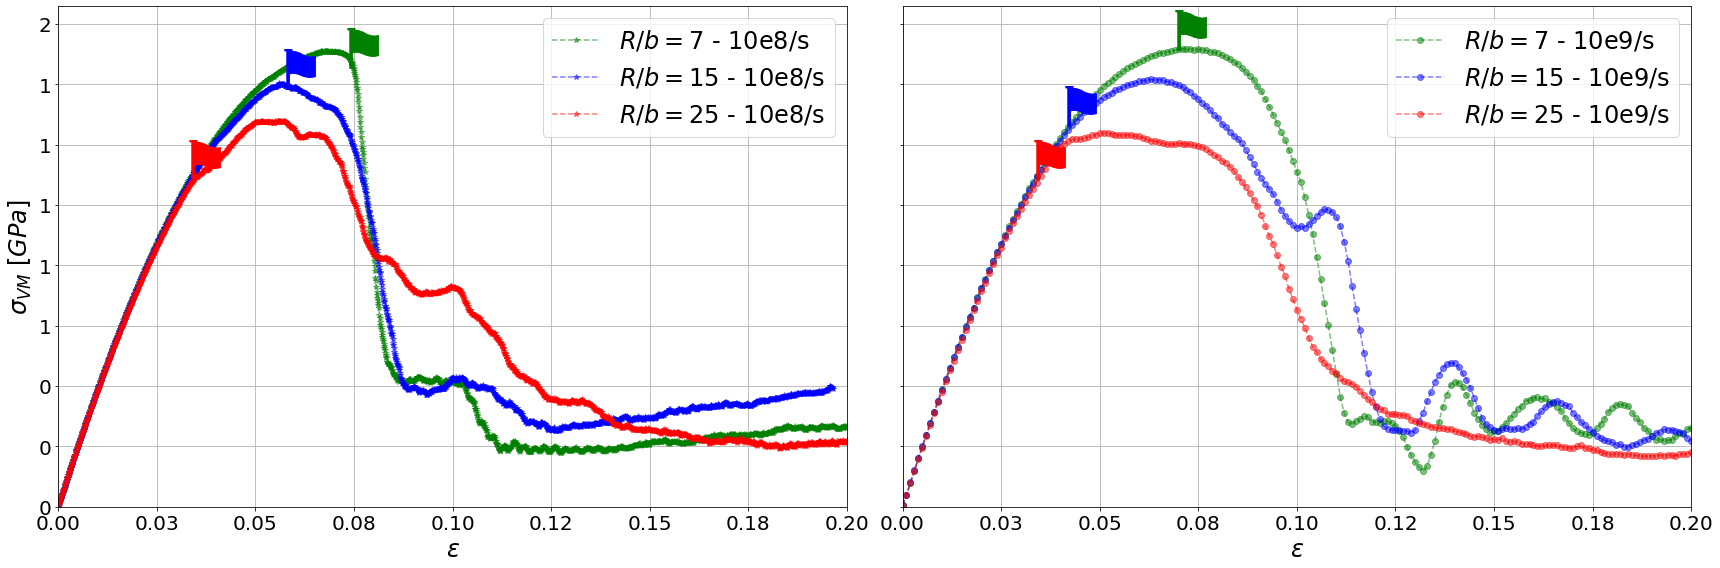

In [205]:
# Curvas Tensión Deformación en Strain rate 10e8/s
# Curvas Tensión Deformación
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(24 ,8),sharey=True)

## Rb7
ax1.plot(Rb7_10e8['Strain'],Rb7_10e8['J2_New']/10000,'*--',alpha=0.5,color='green',label='$R/b=7$ '+ '- 10e8/s')
ax1.plot(0.076,[1.52],marker='$\U00002691$',color='green',markersize=40) # J2p flag

ax2.plot(Rb7['Strain'],Rb7['J2_New']/10000,'o--',alpha=0.5,color='green',label='$R/b=7$ '+ '- 10e9/s')
ax2.plot(0.072,[1.58],color='green',marker='$\U00002691$',markersize=40) #J2p flag

## Rb15
ax1.plot(Rb15_10e8['Strain'],Rb15_10e8['J2_New']/10000,'*--',alpha=0.5,color='blue',label='$R/b=15$ '+'- 10e8/s')
ax1.plot(0.06,[1.45],color='blue',marker='$\U00002691$',markersize=40) # J2p flag


ax2.plot(Rb15['Strain'],Rb15['J2_New']/10000,'o--',alpha=0.5,color='blue',label='$R/b=15$ '+'- 10e9/s')
ax2.plot(0.044,[1.33],color='blue',marker='$\U00002691$',markersize=40) # J2p flag


## Rb25
ax1.plot(Rb25_10e8['Strain'],Rb25_10e8['J2_New']/10000,'*--',alpha=0.5,color='red',label='$R/b=25$ '+'- 10e8/s')
ax1.plot(0.036,[1.15],color='red',marker='$\U00002691$',markersize=40) # J2p flag

ax2.plot(Rb25['Strain'],Rb25['J2_New']/10000,'o--',alpha=0.5,color='red',label='$R/b=25$ '+'- 10e9/s')
ax2.plot(0.036,[1.15],color='red',marker='$\U00002691$',markersize=40) # J2p flag

ax1.legend(fontsize=24);ax1.grid()
ax2.legend(fontsize=24);ax2.grid()

ax1.set_xlabel("$\\epsilon$",size=24);ax1.set_ylabel("$\\sigma_{VM}$ $[GPa]$",size=24)
ax2.set_xlabel("$\\epsilon$",size=24)

ax1.set_xlim(left=0,right=0.2)
ax1.set_ylim(ymin=0)
ax2.set_xlim(left=0,right=0.2)


ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.yaxis.set_major_formatter(plt.FuncFormatter(formatear_y))

plt.tight_layout()
plt.savefig(plots_folder+'/J2strain_10e8_e9.png')
plt.show()

### Figura 10

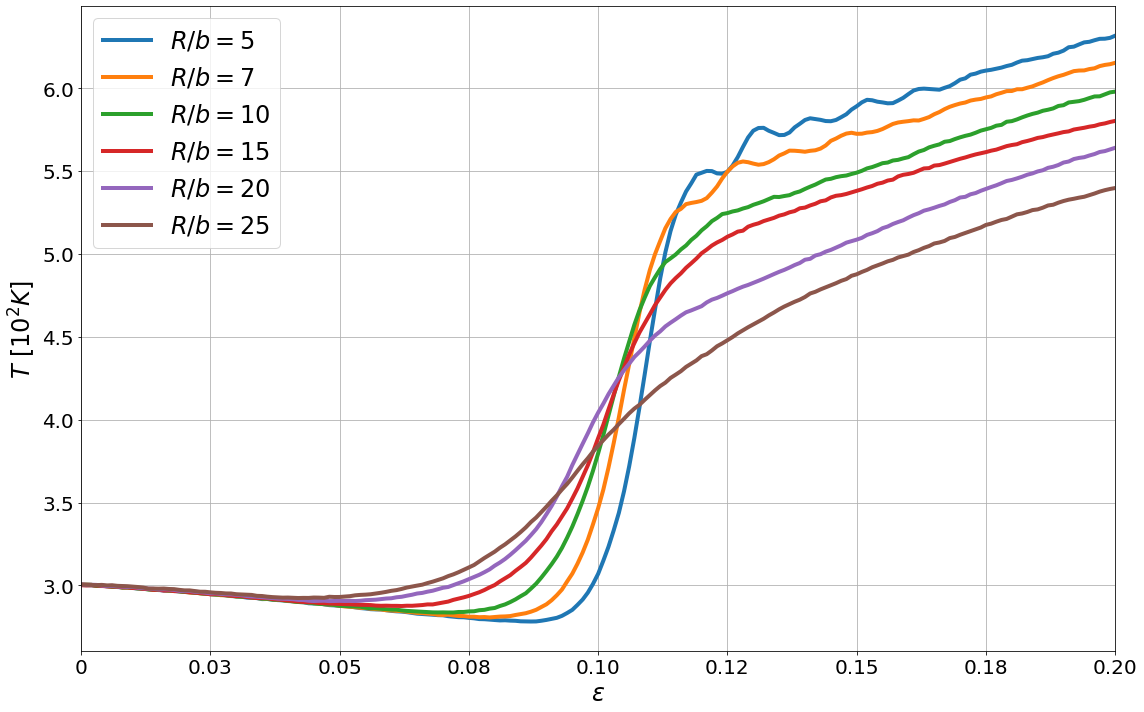

In [210]:
# Temperatura
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,10))
for df,rb in zip(RB[3:],Rb_names[3:]):
  ax.plot(df['Strain'],df['Temp']/100,linewidth=4,label='$R/b=$'+rb)
plt.legend(fontsize=24);plt.grid()

#plt.title("$J_2$ vs. Strain",size=22)
plt.xlabel("$\\epsilon$",size=24);plt.ylabel("$T$ $[10^{2} K]$",size=24)
plt.xticks(size=20);plt.yticks(size=20)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.set_xlim(xmin=0,xmax=0.2)
#ax.set_ylim(ymin=2.5,ymax=6.5)

def formatear_x(valor,tick_number):
  if float(valor)==0.000: return "0"
  else: return "%.2f" % float(valor)

ax.xaxis.set_major_formatter(plt.FuncFormatter(formatear_x))

plt.tight_layout()
plt.savefig(plots_folder+'/Temp_strain.png')
plt.show()

### Figura 8

In [208]:
# Densidad de dislocaciones
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,10))
for df,rb in zip(RB[3:],Rb_names[3:]):
  density = df['Total'].copy()/df['SolidVol'].copy()
  ax.plot(df['Strain'],density*1e4,linewidth=4,label='$R/b=$'+rb)

plt.legend(fontsize=24);plt.grid()
plt.xlabel("$\\epsilon$",size=24);plt.ylabel("$\\rho$ [$10^{16}$m$^{-2}$]",size=24)
plt.xticks(size=24);plt.yticks(size=24)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.set_xlim(xmin=0,xmax=0.2)
ax.set_ylim(ymin=0)

def formatear_x(valor,tick_number):
  if float(valor)==0.000: return "0"
  else: return "%.2f" % float(valor)

def formatear_y(valor,tick_number):
  if float(valor)==0.000: return "0"
  else: return "%.1f" % float(valor)

ax.xaxis.set_major_formatter(plt.FuncFormatter(formatear_x))
ax.yaxis.set_major_formatter(plt.FuncFormatter(formatear_y))

plt.tight_layout()
plt.savefig(plots_folder+'/Density_strain.png')
plt.show()

### Figura 14

In [211]:
# Comparación de algunas longitudes de dislocacion con TA
## Levantamos los datos de Orlando del csv

df_orlando = pd.read_csv('hea_data/data_Ta/Longitud_Total_Dislocaciones_nm.csv',sep='\t',decimal=',')
# df_orlando.head()

### Figura 6

In [213]:
from scipy.optimize import curve_fit

In [214]:
# Datos del RelevantData del Drive 
E = 10*np.array([3.96,3.95,3.95,3.87,3.878,3.87,3.81,3.75,3.66])
error_E = 10*np.array([0.01,0.01,0.02,0.01,0.007,0.01,0.01,0.01,0.01])

In [215]:
# Cálculo de la porosidad para todos los R/b
a0 = 0.363e-9 #nm
b = 0.303e-9 # Módulo del vector de Burgers
def porosidad(rb):
    # Esto en realidad es 1- porosidad
    return ((100*a0)**3-(4/3)*np.pi*(rb*b)**3)/(100*a0)**3
    #return ((4/3)*np.pi*(rb*b)**3)/(100*a0)**3
porosity = np.array([porosidad(rb) for rb in Rb_values ])

In [216]:
# Armado del modelo propuesto
E_0 = 6.662456e2 #Bar, sacado por carlos en base a Cij de Orlando
def modelGA(X,a,q):
    return E_0*a*((X**q) + X) 
def modelGA_New(X,a):
    return a*(0.5*np.power(X,2) + 0.3*X)
## El modelo es la ec. 1 de Ruestes et al. Materials Science,2014.
## -> Es el correspondiente a esta orientación cristalográfica
##       C11=166, C12=119 resulta E_100=((C11+2*C12)(C11-C12)/(C11+C12))=66.62 GPa

En base a esta gráfica, propongo hacer tres modelos:
- En uno lo hacemos con todos los datos
- En otro lo hacemos con todos los datos $R/b>3$
- En otro lo hacemos con todos los datos $R/b>4$

Con eso vemos cuál es el más válido, con algún parámetro que sea útil (por ej. $R^2$).

#### Version 1 

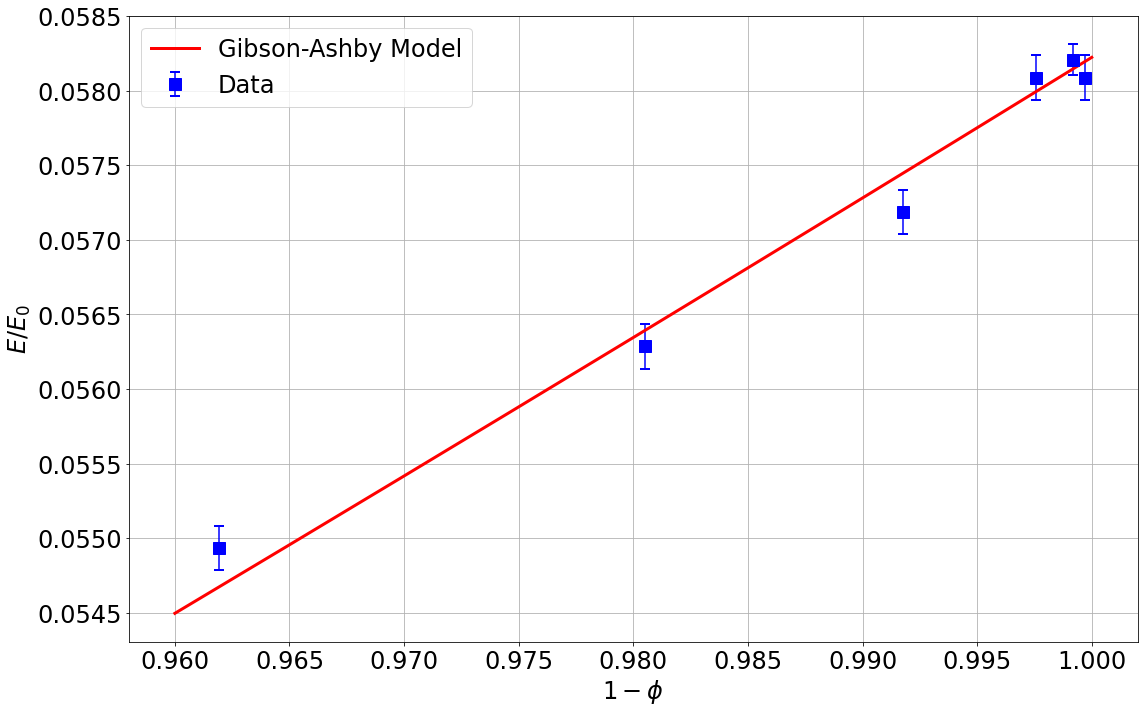

In [218]:
# Hacemos el ajuste con curve_fit
#popt, pcov = curve_fit(modelGA_New, porosity, E/E_0,sigma=error_E/E_0)
#popt2, pcov2 = curve_fit(modelGA_New, porosity[2:], E[2:]/E_0,sigma=error_E[2:]/E_0)
popt3, pcov3 = curve_fit(modelGA_New, porosity[3:], E[3:]/E_0,sigma=error_E[3:]/E_0)

# curve_fit devuelve dos resultados. El primero (popt) son los
# parámetros óptimos hallados. El segundo (pcov) es la matriz de
# covarianza de los parámetros hallados.

X = np.linspace(0.96,1,1000)

#s=0.3*E_0*((X**1.5) + X) 

plt.figure(figsize=(16,10))
plt.errorbar(porosity[3:],E[3:]/E_0,yerr=error_E[3:]/E_0,markersize=12,capsize=5, capthick=2,fmt='bs',label='Data')
#plt.plot(X, modelGA_New(X, *popt),color='blue',linewidth=2, label='Modelo original')
#plt.plot(X, modelGA_New(X, *popt2),color='red',linewidth=2 ,label='Modelo 2')
plt.plot(X, modelGA_New(X, *popt3),color='red',linewidth=3 ,label='Gibson-Ashby Model')

plt.legend(loc='best',fontsize=24)
plt.xlabel('$1-\\phi$',size=24)
plt.ylabel('$E/E_0$',size=24)
plt.xticks(size=24);plt.yticks(size=24)
plt.grid()
plt.tight_layout()
plt.savefig(plots_folder+"/E_porosity_3modelos.png")

#### Version Congreso 

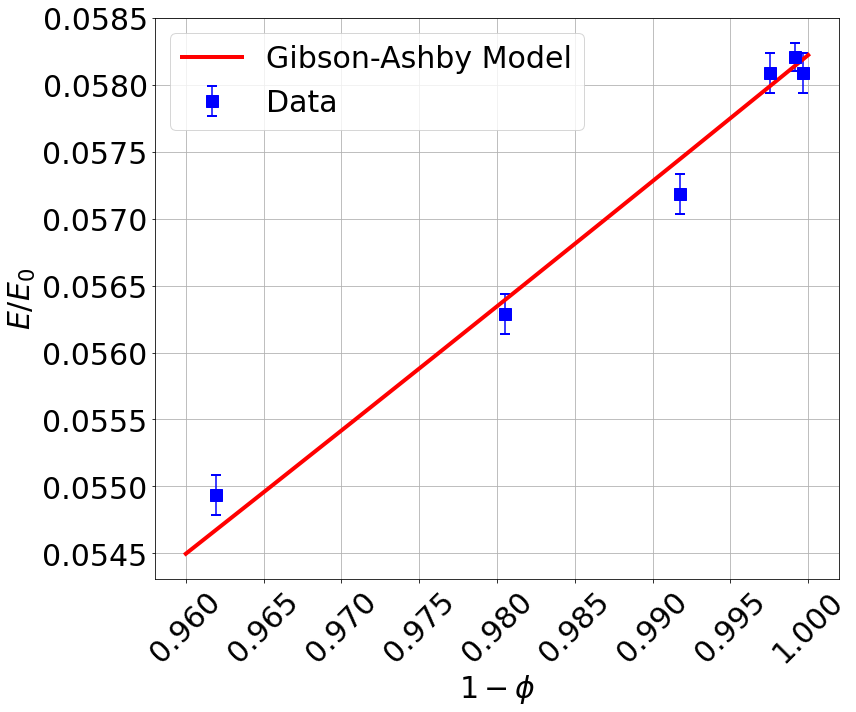

In [219]:
# Versión Congreso
plt.figure(figsize=(12,10))
plt.errorbar(porosity[3:],E[3:]/E_0,yerr=error_E[3:]/E_0,markersize=12,capsize=5, capthick=2,fmt='bs',label='Data')
#plt.plot(X, modelGA_New(X, *popt),color='blue',linewidth=2, label='Modelo original')
#plt.plot(X, modelGA_New(X, *popt2),color='red',linewidth=2 ,label='Modelo 2')
plt.plot(X, modelGA_New(X, *popt3),color='red',linewidth=4 ,label='Gibson-Ashby Model')

SIZE = 30
plt.legend(loc='best',fontsize=SIZE)
plt.xlabel('$1-\\phi$',size=SIZE)
plt.ylabel('$E/E_0$',size=SIZE)
plt.xticks(size=SIZE,rotation = 45);plt.yticks(size=SIZE)
plt.grid()
plt.tight_layout()
plt.savefig(plots_folder+"/E_porosity_congreso.png")

### Figura 7

In [220]:
# Cargamos los datos de la hoja 3 de RelevantData, en una matriz. 

# La 1ra fila tiene J2p, y la segunda el epsilon corresp. 
J2p = np.array([[13335,13291,13597,14882,15178,14716,12803,12064,11915],
       [0.108,0.108,0.100,0.088,0.072,0.076,0.044,0.040,0.0400]])

# Acá los datos revisados...
J2p_2 = np.array([[14447,14447,13597,14882,15178,14716,12803,12064,11915],
       [0.100,0.100,0.100,0.088,0.072,0.076,0.044,0.040,0.0400]])

In [221]:
## Parámetros 
### HEA
gamma = 2.49*0.06242 #, eV/A²
G = 5.2e5 #bar 
b = 3.03 # Angstrom
nu = 0.33 
m = 2.2 # adimensional

### Ta puro
gamma_Ta = 2.49*0.06242 #eV/A²
G_Ta = 7.4e5 # bar
b_Ta = 2.86 # Angstrom
nu_Ta = 0.38
m_Ta = 2.2
rho_Ta = 1.0

In [222]:
# Modelos

def Meyers_model(Rb,rho):
    R1 = Rb/2
    first_term = 2*gamma/(G*np.pi*rho*b)
    second_term = (2-nu)/(2*np.pi*(1-nu)*R1)
    log_factor = second_term*np.log((8*m*R1)/(np.e**2*rho))
    return 0.224*(first_term+log_factor)

def Meyers_model_Ta(Rb):
    R1 = Rb/2
    first_term = 2*gamma_Ta/(G_Ta*np.pi*rho_Ta*b_Ta)
    second_term = (2-nu_Ta)/(2*np.pi*(1-nu_Ta)*R1)
    log_factor = second_term*np.log((8*m_Ta*R1)/(np.e**2*rho_Ta))
    return 0.224*(first_term+log_factor)

In [223]:
RB = np.linspace(5,25,1000)
RB_Ta = np.linspace(2,25,1000)
J2p_G = J2p[0]/G

In [ ]:
popt, pcov = curve_fit(Meyers_model,Rb_values[3:],J2p_G[3:])
pstd = np.diag(pcov)

print(popt,pstd) # Estimación de rho con error!

In [225]:
# Ahora agregamos los datos en Ta de Orlando :)
Rb_Ta = [3,10,25]
J2p_G_Ta = [0.065,0.051,0.035]

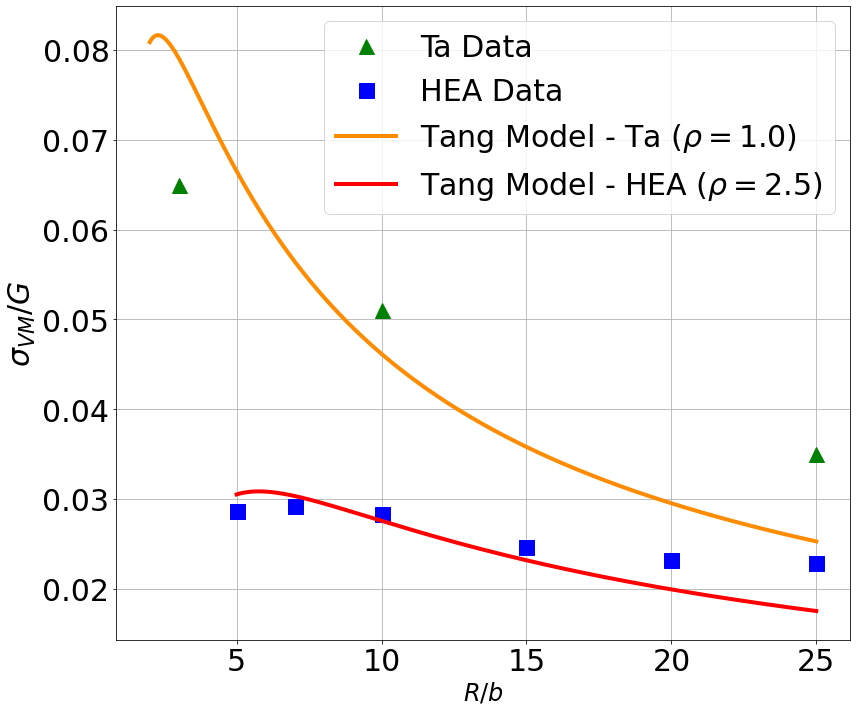

In [226]:
# Version Congreso
plt.figure(figsize=(12,10))
plt.plot(Rb_Ta,J2p_G_Ta,'^',markersize=15,color='green',label='Ta Data')
plt.plot(Rb_values[3:],J2p_G[3:],'s',markersize=15,color='blue',label='HEA Data')
plt.plot(RB_Ta,Meyers_model_Ta(RB_Ta),label='Tang Model - Ta ($\\rho=1.0$)',color='darkorange',linewidth=4)
plt.plot(RB,Meyers_model(RB,*popt),color='red',label='Tang Model - HEA ($\\rho=$'+str(round(popt[0],1))+')',linewidth=4)
#plt.plot(RB,Meyers_simplificado(RB),label='Modelo Simplificado')
#plt.xticks(Rb,['3','3','4','5','7','10','15','20','25'],size=14)
plt.xlabel('$R/b$',size=24);plt.ylabel('$\\sigma_{VM}/G$',size=SIZE)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.yticks(size=SIZE);plt.xticks(size=SIZE)
plt.legend(fontsize=SIZE)
plt.grid()
plt.tight_layout()
plt.savefig(plots_folder+'/J2p_Rb_All.png')

### Otras gráficas que no están en el paper

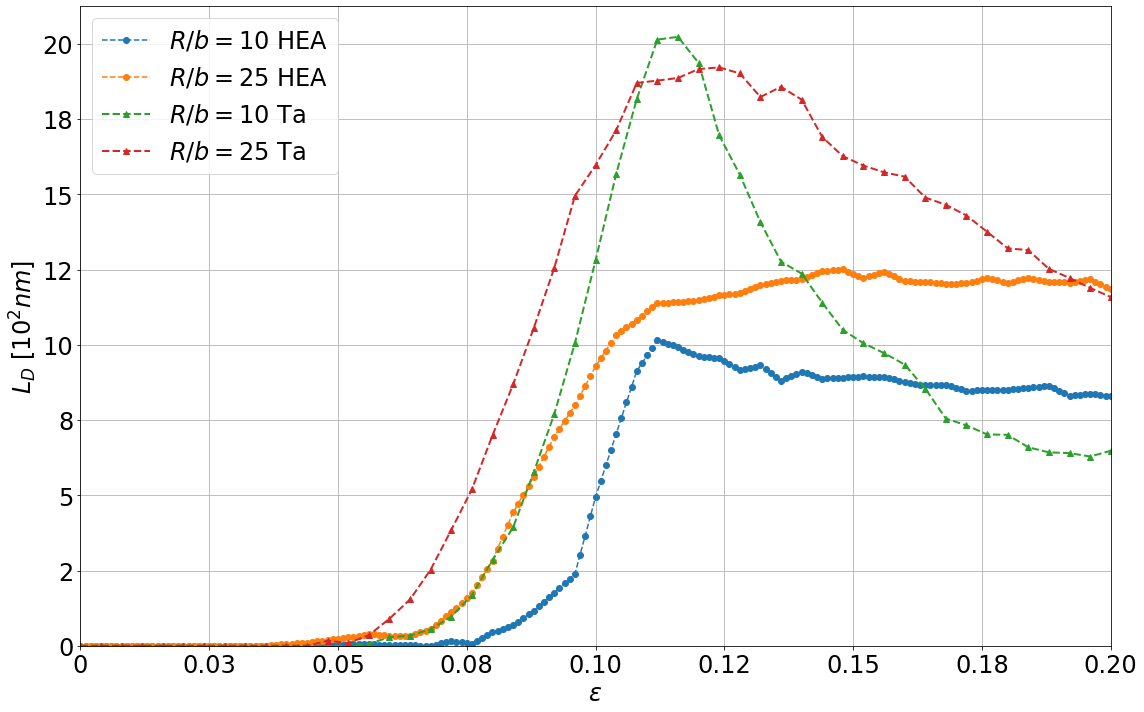

In [227]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,10))

ax.plot(Rb10['Strain'],(Rb10['Total'])/1000,'o--',label='$R/b=10$ HEA')
ax.plot(Rb25['Strain'],(Rb25['Total'])/1000,'o--',label='$R/b=25$ HEA')

ax.plot(df_orlando['Strain'],df_orlando['R/b=10']/100,'^--',linewidth=2,label='$R/b=10$ Ta')
ax.plot(df_orlando['Strain'],df_orlando['R/b=25']/100,'^--',linewidth=2,label='$R/b=25$ Ta')

plt.legend(fontsize=24);plt.grid()
plt.xlabel('$\\epsilon$',fontsize=24);plt.ylabel('$L_D$ $[10^{2} nm]$',fontsize=24)
plt.xticks(size=24);plt.yticks(size=24)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.set_xlim(xmin=0,xmax=0.2)
ax.set_ylim(ymin=0)

def formatear_x(valor,tick_number):
  if float(valor)==0.000: return "0"
  else: return "%.2f" % float(valor)

def formatear_y(valor,tick_number):
  if float(valor)==0.000: return "0"
  else: return "%.0f" % float(valor)

ax.xaxis.set_major_formatter(plt.FuncFormatter(formatear_x))
ax.yaxis.set_major_formatter(plt.FuncFormatter(formatear_y))

plt.tight_layout()
plt.savefig(plots_folder+'/LD_Strain_All.png')

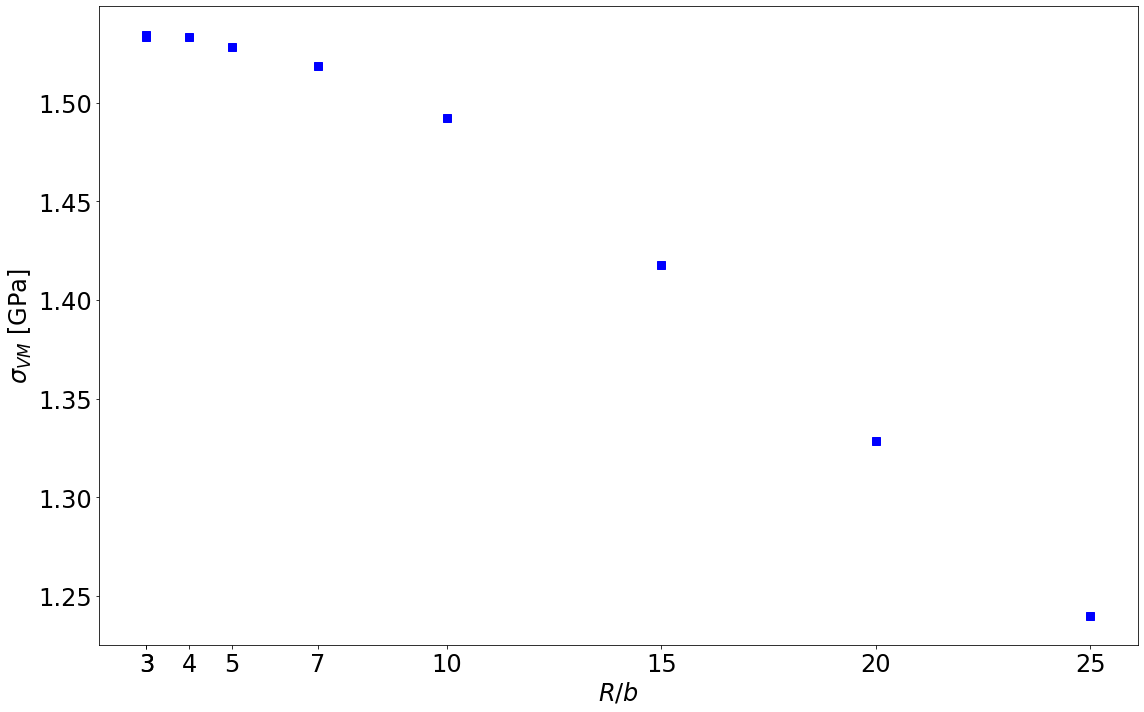

In [212]:
# J_2 máx vs. R/b
J2max = np.array([rb['J2_New'].max() for rb in RB])
plt.figure(figsize=(16,10))
plt.plot(Rb_values,J2max/10000,'s',markersize=8,color='blue')
plt.xticks(Rb_values,labels=Rb_ticks,size=24)

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.yticks(size=24)
#plt.xlabel("$R/b$",size=20);plt.ylabel("$J_2$ máx[bar]",size=20)
plt.xlabel("$R/b$",size=24);plt.ylabel("$\\sigma_{VM}$ [GPa]",size=24) # 14/6 Franco: Les parece bien con este formato? Sí(N)
plt.tight_layout()
plt.savefig(plots_folder+'/J2max_Rb.png')
plt.show()